# 线性模型和梯度下降

## 一元线性回归模型

In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(2017)

In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

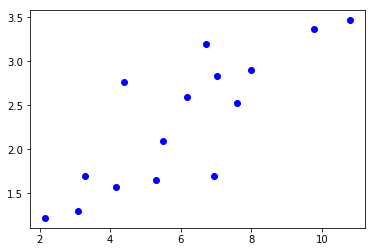

In [3]:
# 画出图像
plt.plot(x_train, y_train, 'bo')

In [4]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

In [5]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [6]:
y_ = linear_model(x_train)

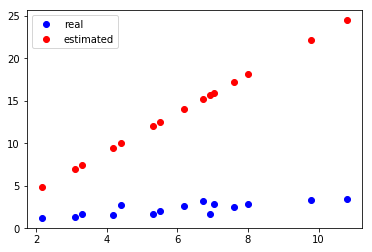

In [7]:
# 画出更新之前的模型
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [8]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

In [9]:
# 打印一下看看 loss 的大小
print(loss)

Variable containing:
 153.3520
[torch.FloatTensor of size 1]



In [10]:
# 自动求导
loss.backward()

In [11]:
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

Variable containing:
 161.0043
[torch.FloatTensor of size 1]

Variable containing:
 22.8730
[torch.FloatTensor of size 1]



In [12]:
# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

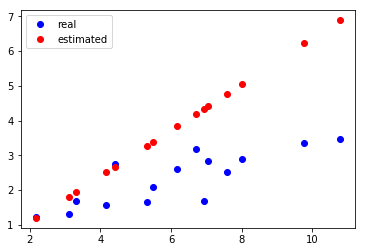

In [13]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [14]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.data.zero_() # 记得归零梯度
    b.grad.data.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: 3.1357719898223877
epoch: 1, loss: 0.3550889194011688
epoch: 2, loss: 0.30295443534851074
epoch: 3, loss: 0.30131956934928894
epoch: 4, loss: 0.3006229102611542
epoch: 5, loss: 0.29994693398475647
epoch: 6, loss: 0.299274742603302
epoch: 7, loss: 0.2986060082912445
epoch: 8, loss: 0.2979407012462616
epoch: 9, loss: 0.29727882146835327


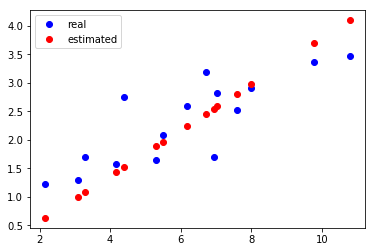

In [15]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

经过 10 次更新，我们发现红色的预测结果已经比较好的拟合了蓝色的真实值。

## 多元线性回归模型

In [16]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


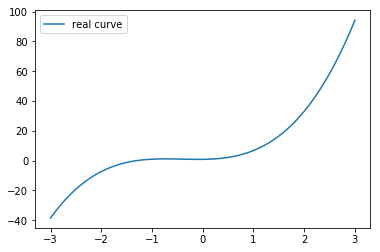

In [17]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

In [18]:
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]

x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor

y_train = torch.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor 

In [19]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

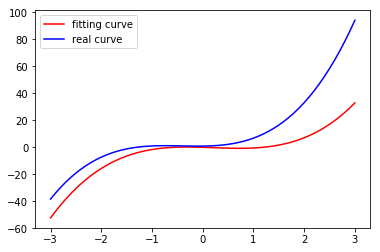

In [20]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [21]:
# 计算误差，这里的误差和一元的线性模型的误差是相同的，前面已经定义过了 get_loss
loss = get_loss(y_pred, y_train)
print(loss)

Variable containing:
 413.9843
[torch.FloatTensor of size 1]



In [22]:
# 自动求导
loss.backward()

In [23]:
# 查看一下 w 和 b 的梯度
print(w.grad)
print(b.grad)

Variable containing:
 -34.1391
-146.6133
-215.9148
[torch.FloatTensor of size 3x1]

Variable containing:
-27.0838
[torch.FloatTensor of size 1]



In [24]:
# 更新一下参数
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data

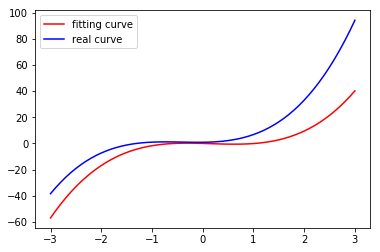

In [25]:
# 画出更新一次之后的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [26]:
# 进行 100 次参数更新
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data[0]))

epoch 20, Loss: 73.67840
epoch 40, Loss: 17.97097
epoch 60, Loss: 4.94101
epoch 80, Loss: 1.87171
epoch 100, Loss: 1.12812


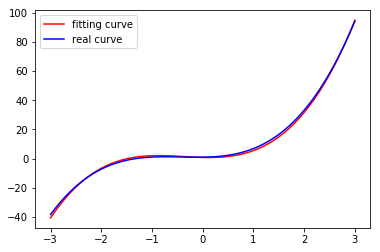

In [27]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

经过 100 次更新之后，可以看到拟合的线和真实的线已经完全重合了